<a href="https://colab.research.google.com/github/Dimas0824/2341720088_ML_2025/blob/main/JS14/TP_JS14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐘 Tugas Praktimum

## Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

dari pipeline diatas saya menambahkan integrasi optuna untuk mencari parameter terbaik sehingga dapat memenuhi akurasi diatas 80%

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Unduh dataset

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


### Verifikasi data

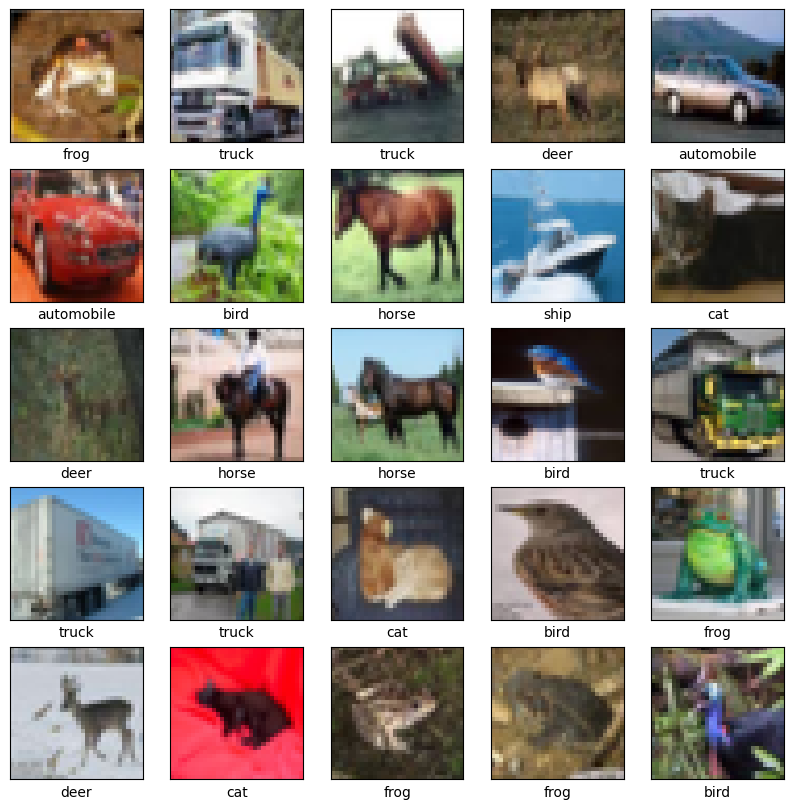

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

### Buat Layer Konvolusi



In [6]:
model = models.Sequential()

# Block 1 - 3 Conv layers
model.add(layers.Conv2D(96, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(96, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(96, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

# Block 2 - 3 Conv layers
model.add(layers.Conv2D(192, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(192, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(192, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.35))

# Block 3 - 4 Conv layers
model.add(layers.Conv2D(384, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(384, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(384, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(384, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.45))

### Cek Arsitektur Konvolusi



In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 192)    │       166,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 192)    │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 192)    │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 192)    │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 192)    │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 192)    │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 384)      │       663,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 8, 8, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 384)      │     1,327,48

 Total params: 5,654,784 (21.57 MB)

 Trainable params: 5,649,984 (21.55 MB)

 Non-trainable params: 4,800 (18.75 KB)

### Tambahkan Layer Fully Connected



In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

### Cek Arsitektur Model CNN



In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 192)    │       166,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 192)    │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 192)    │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 192)    │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 192)    │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 192)    │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 384)      │       663,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 8, 8, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 384)      │     1,327,48

 Total params: 9,072,906 (34.61 MB)

 Trainable params: 9,066,058 (34.58 MB)

 Non-trainable params: 6,848 (26.75 KB)

### Compile Model CNN



In [10]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

### Tambahan configurasi

reduce LR digunakan untuk mengurangi learning rate ketika model mulai stagnan dan tidak mempelajari hal baru.
early stop digunakan untuk menghentikan training ketika model sudah mentok dan stagnan dan value loss malah naik lagi.
dan model checkpoint digunakan untuk save model terbaik dari hasil train agar nanti jika diperlukan tidak melakukan training ulang.

In [11]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# Callback ReduceLROnPlateau: turunkan LR jika val_loss stagnan
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# Callback EarlyStopping: hentikan training jika tidak ada perbaikan
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Callback ModelCheckpoint: simpan model terbaik
checkpoint = ModelCheckpoint(
    filepath='model_js14.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

### Fit Model



In [13]:
history = model.fit(
    train_images, train_labels,
    batch_size=32,
    epochs=100,
    validation_data=(test_images, test_labels),
    callbacks=[reduce_lr, early_stop, checkpoint],
    verbose=1
)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5268 - loss: 1.3226
Epoch 1: val_accuracy improved from -inf to 0.66710, saving model to model_js14.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.5268 - loss: 1.3225 - val_accuracy: 0.6671 - val_loss: 0.9545 - learning_rate: 0.0010
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6650 - loss: 0.9555
Epoch 2: val_accuracy improved from 0.66710 to 0.70890, saving model to model_js14.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.6650 - loss: 0.9554 - val_accuracy: 0.7089 - val_loss: 0.8637 - learning_rate: 0.0010
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7333 - loss: 0.7848
Epoch 3: val_accuracy improved from 0.70890 to 0.71750, saving model to model_js14.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7333 - loss: 0.7848 - val_accuracy: 0.7175 - val_loss: 0.8416 - learning_rate: 0.0010
Epoch 4/100
1563/1563 ━━━━━━━━━

313/313 - 4s - 12ms/step - accuracy: 0.9062 - loss: 0.5169


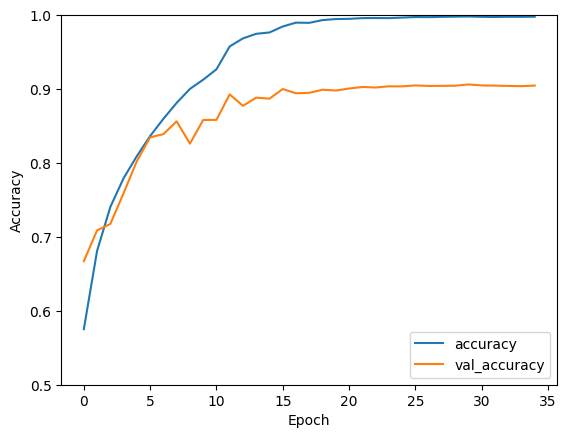

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [15]:
print(test_acc)

0.9061999917030334


## Buatlah model CNN untuk klasifikasi dataset MNIST.


### Import libraries

In [50]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Load Dataset MNIST

In [51]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Cek shape dataset
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Preprocessing

#### Reshape ke (28, 29, 1)

In [52]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test  = x_test.reshape((x_test.shape[0], 28, 28, 1))

#### Normalisasi (0–255 → 0–1)

In [53]:
x_train = x_train / 255.0
x_test  = x_test / 255.0

#### Tampilkan contoh gambar yang sudah melalui preprocessing

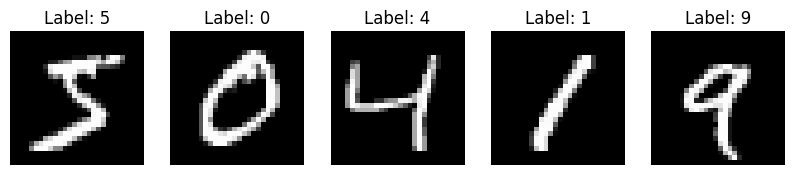

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")

plt.show()

### Bangun Model CNN

In [55]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [56]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Pembuatan callbacks seperti pada sebelumnya yaitu earlystopping, reduceLROnPletau, dan save best model.

In [57]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

checkpoint = ModelCheckpoint(
    filepath='js14_mnist_cnn.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

### Compile model

In [64]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Fit Model dan Mulai Training

In [65]:
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

Epoch 1/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8870 - loss: 0.3829
Epoch 1: val_accuracy improved from -inf to 0.98533, saving model to js14_mnist_cnn.keras
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8870 - loss: 0.3826 - val_accuracy: 0.9853 - val_loss: 0.0501 - learning_rate: 0.0010
Epoch 2/100
837/844 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9820 - loss: 0.0543
Epoch 2: val_accuracy did not improve from 0.98533
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9821 - loss: 0.0542 - val_accuracy: 0.9837 - val_loss: 0.0544 - learning_rate: 0.0010
Epoch 3/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9892 - loss: 0.0355
Epoch 3: val_accuracy improved from 0.98533 to 0.98833, saving model to js14_mnist_cnn.keras
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9892 - loss: 0.0355 - val_accuracy: 0.9883 - val_loss: 0.0387 - learning_rate: 0.0010
Epoch 4/100
830/844 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9923 - loss: 0.

### Evaluasi Model

In [66]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9875 - loss: 0.0349
Test Accuracy: 0.9900


In [68]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict test set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



#### Confussion Matrix

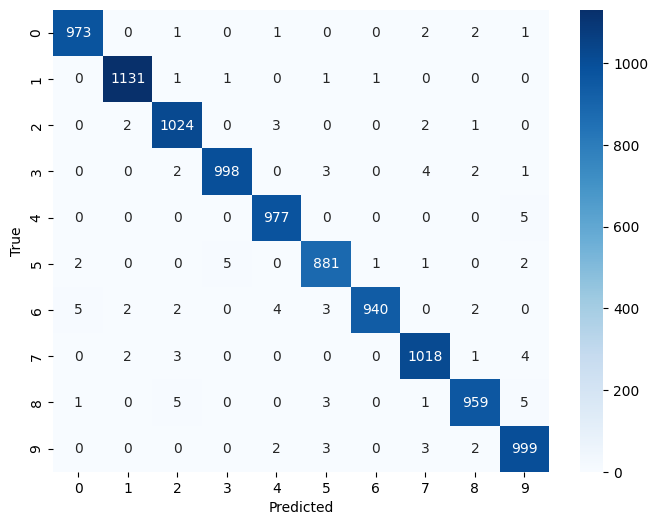

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


### Training plot

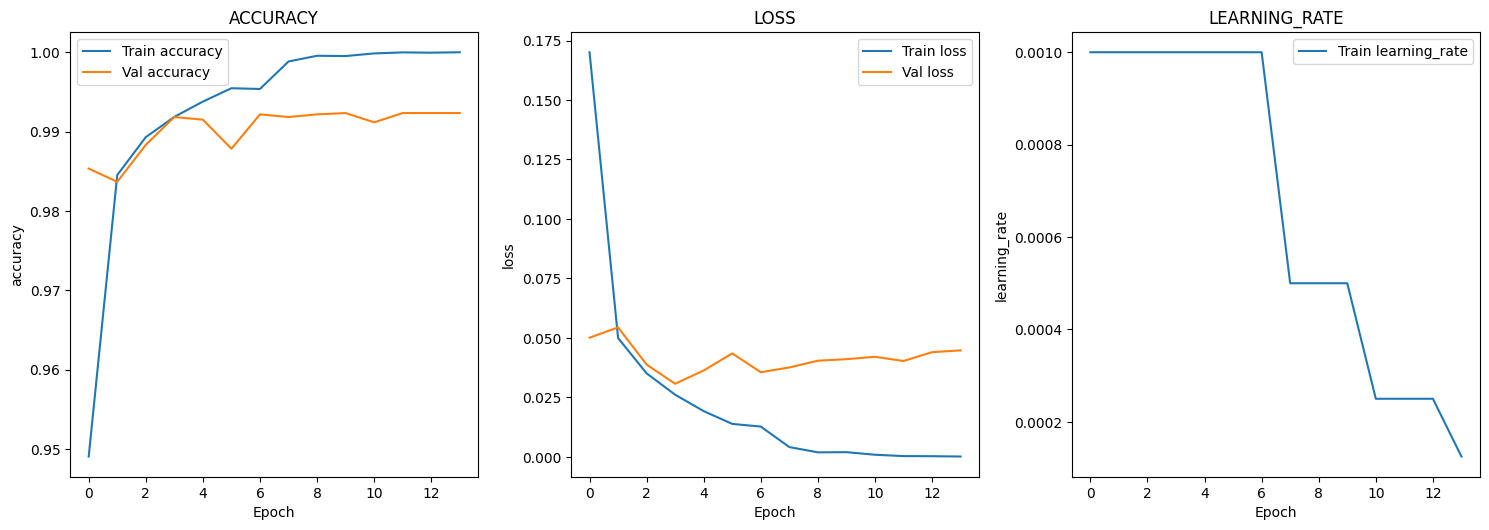

In [71]:
import matplotlib.pyplot as plt

def training_plot(history):
    # ambil semua key dalam history
    keys = list(history.history.keys())

    # kelompokkan: training metrics dan validation metrics
    train_metrics = [k for k in keys if not k.startswith("val_")]
    val_metrics   = [k for k in keys if k.startswith("val_")]

    plt.figure(figsize=(15, 10))

    for i, metric in enumerate(train_metrics):
        plt.subplot(2, 3, i+1)
        plt.plot(history.history[metric], label=f"Train {metric}")

        val_metric = f"val_{metric}"
        if val_metric in history.history:
            plt.plot(history.history[val_metric], label=f"Val {metric}")

        plt.title(metric.upper())
        plt.xlabel("Epoch")
        plt.ylabel(metric)
        plt.legend()

    plt.tight_layout()
    plt.show()

training_plot(history)

### Prediksi Contoh Gambar

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediksi : 2
Label sebenarnya : 2


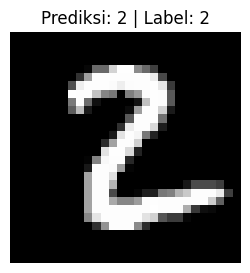

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil satu data dari test
index = 1432   # index gambar yang akan diprediksi
contohData = x_test[index].reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(contohData)
predicted_class = np.argmax(prediction)

print("Prediksi :", predicted_class)
print("Label sebenarnya :", y_test[index])

# Visualisasi
plt.figure(figsize=(3,3))
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Prediksi: {predicted_class} | Label: {y_test[index]}")
plt.axis("off")
plt.show()
